In [52]:

import scipy.integrate
import numpy as np

In [53]:
import numpy as np
import scipy
import matplotlib.pyplot as plt


def deriv(vars,t,l1=1.,l2=1.,m1=1.,m2=1.,g=9.8):
    
    (theta1,theta2,omega1,omega2)=vars
    theta1dot = omega1
    theta2dot = omega2
    
 
    s1=np.sin(theta1)
    s2=np.sin(theta2)
    cd=np.cos(theta1-theta2)
    sd=np.sin(theta1-theta2)
    
  
    l1=1.*l1
    m1=1.*m1
    
    num1=-(l2/l1)*omega2**2*sd-g*(1+m1/m2)*s1 #equations of motion obtained by solving the lagrangian
    num2=(l1/l2)*omega1**2*sd-g*s2
    
    den=1.+m1/m2-cd**2
    
    omega1dot =(num1-(l2/l1)*cd*num2)/den
    omega2dot =((1+m1/m2)*num2-(l1/l2)*cd*num1)/den
    
    return np.array([theta1dot,theta2dot,omega1dot,omega2dot])


def doublependulumenergy(theta1,theta2,omega1,omega2,l1,l2,m1,m2,g):
    """ Returns the energy of a double pendulum """
    c1=np.cos(theta1)
    c2=np.cos(theta2)
    s1=np.sin(theta1)
    s2=np.sin(theta2)
    kin=(1/2)*m1*(l1*omega1)**2+(1/2)*m2*(l1*omega1*c1+l2*omega2*c2)**2+(1/2)*m2*(l1*omega1*s1+l2*omega2*s2)**2
    pot=-m1*g*l1*c1-m2*g*(l1*c1+l2*c2)
    return kin+pot


def doublependulumsolve(initial_theta1=0,initial_theta2=0,initial_omega1=0,initial_omega2=0,timestep=0.1,numstep=500,l1=1,l2=1,m1=1,m2=1,g=1):
    """ Runs ODEint for the double pendulum 
    
    sample usage:
    doublependulumsolve(initial_theta1=0.1,l1=2,l2=2,m1=1,m2=2,g=9.8)
    
    Returns a dictionary which has the following keys:
    "times", "theta1", "theta2", "omega1", "omega2", "parameters"
    
    The values associated with the first five keys are a time series.
    The parameters key returns a dictionary which stores the parameters, plus the energy of the system
    """
    
    p={"l1":l1,"l2":l2,"m1":m1,"m2":m2,"g":g}
    
    # Create a tuple containing (l1,l2,m1,m2,g)
    par=(l1,l2,m1,m2,g)        # Converts parameters to a tuple in the right order
    
    # Create a tuple containing the inital values
    initial=(initial_theta1,initial_theta2,initial_omega1,initial_omega2)
    
    # Create the list of times
    timevals=np.arange(numstep)*timestep
    
    #odeint solver
    
    sol = scipy.integrate.odeint(deriv,initial,timevals,par)
    
    # Store the results of odeint in a dictionary
    data={}
    data["times"]=timevals
    data["theta1"]=sol[:,0]
    data["theta2"]=sol[:,1]
    data["omega1"]=sol[:,2]
    data["omega2"]=sol[:,3]
    p["energy"]=doublependulumenergy(theta1=sol[0,0],theta2=sol[0,0],omega1=sol[0,0],omega2=sol[0,0],**p)
    data["parameters"]=p
    
    # Return the dictionary
    return data


def showtrajectory(data):
    "pass the data dictionary obtained as a result of solving the EOM. This function plots the trajectory of the motion"
    
    param = data["parameters"]
    l1=parameters["l1"]
    l2=parameters["l2"]
    theta1=data["theta1"]
    theta2=data["theta2"]
    x1=l1*np.sin(theta1)
    y1=-l1*np.cos(theta1)
    x2=l2*np.sin(theta2)+x1
    y2=l2*np.sin(theta2)+y1
    plt.scatter((0,),(0,))
    plt.plot(x1,y1,'g',x2,y2,'r')
    plt.show()
    return


def timeseries(data):
    "returns the time freeze of the double pendulum motion. call it with the data dictionary obtained"
    
    l1=parameters["l1"]
    l2=parameters["l2"]
    theta1=data["theta1"]
    theta2=data["theta2"]
    x1=l1*np.sin(theta1)
    y1=-l1*np.cos(theta1)
    x2=l2*np.sin(theta2)+x1
    y2=l2*np.sin(theta2)+y1
    t=data["times"]
    plt.plot(t,x1,'g+',t,y1,'g-',t,x2,'r+',t,y2,'r-')
    plt.show()
    return    


def ShowDoublePendulumPoincare(data):
    """ Call with a dictionary containing 
    "times", "theta1", "theta2", "omega1", "omega2","parameters".
    
    Generates a Poincare section:
    plots omega2 vs theta2 when theta1=0 and omega1>0.
    """
    
    #unpack data
    parameters=data["parameters"]
    l1=parameters["l1"]
    l2=parameters["l2"]
    theta1=data["theta1"]
    theta2=data["theta2"]
    omega1=data["omega1"]
    omega2=data["omega2"]
    x1=l1*np.sin(theta1)
    y1=-l1*np.cos(theta1)
    x2=l2*np.sin(theta2)+x1
    y2=l2*np.sin(theta2)+y1
    t=data["times"]
    
    #bracket times where theta1 passes through n*2pi for some n, and with omega1>0
    thetasignprod=(np.sin(theta1[:-1])*np.sin(theta1[1:])<0)&(np.cos(theta1[:-1])>0)&(omega1[:-1]>0)
    signchangeloc=np.where(thetasignprod)[0]
    
    #interpolate between these bracketed times to find theta2 and omega2 at those times.
    theta2dat=np.array([lininterp(xvals=(np.sin(theta1[s]),np.sin(theta1[s+1])),yvals=(theta2[s],theta2[s+1])) for s in signchangeloc])
    omega2dat=np.array([lininterp(xvals=(np.sin(theta1[s]),np.sin(theta1[s+1])),yvals=(omega2[s],omega2[s+1])) for s in signchangeloc])
    #make a scatter plot
    plt.scatter(theta2dat,omega2dat)
    
    return

def lininterp(xvals,yvals):
    """ xvals and yvals are tuples of length 2:
    taking (x0,y0) and (x1,y1) to be points defining a line
    finds the value of y when x=0"""
    #print(xvals)
    return (xvals[1]*yvals[0]-xvals[0]*yvals[1])/(xvals[1]-xvals[0])
        
    
            

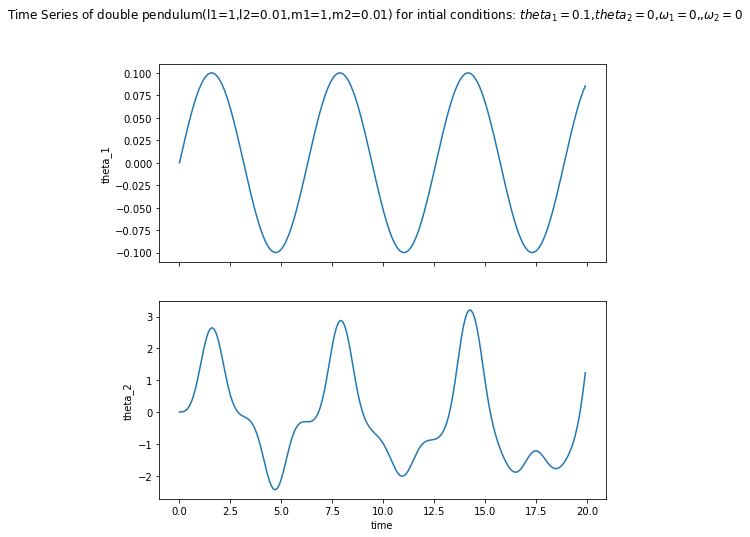

In [103]:
trial1= doublependulumsolve(initial_omega1=0.1,l1=1,l2=0.01,m1=1,m2=0.01,g=1,timestep=0.1,numstep=200) #like a simple pendulum

fig,ax = plt.subplots(nrows=2,figsize=(8,8),sharex=True)
fig.suptitle("Time Series of double pendulum(l1=1,l2=0.01,m1=1,m2=0.01) for intial conditions: $theta_1=0.1$,$theta_2=0$,$\omega_1=0$,,$\omega_2=0$")
ax[0].plot(trial1["times"],trial1["theta1"])
ax[0].set_ylabel("theta_1")
ax[1].plot(trial1["times"],trial1["theta2"])
ax[1].set_xlabel("time")
ax[1].set_ylabel("theta_2")
fig.savefig("doublependulumtrial1.pdf")

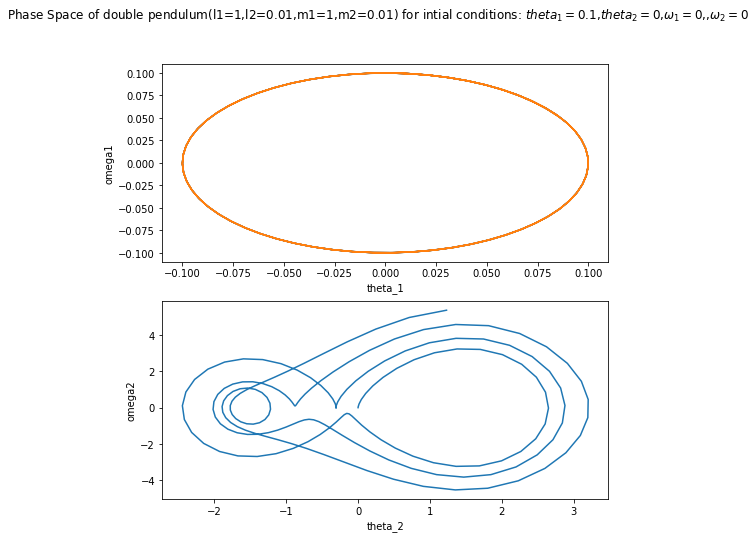

In [104]:
fig,ax = plt.subplots(nrows=2,figsize=(8,8))
fig.suptitle("Phase Space of double pendulum(l1=1,l2=0.01,m1=1,m2=0.01) for intial conditions: $theta_1=0.1$,$theta_2=0$,$\omega_1=0$,,$\omega_2=0$")
ax[0].plot(trial1["theta1"],trial1["omega1"])
ax[0].set_ylabel("omega1")
ax[0].set_xlabel("theta_1")
ax[0].plot(trial1["theta1"],trial1["omega1"])
ax[1].plot(trial1["theta2"],trial1["omega2"])
ax[1].set_ylabel("omega2")
ax[1].set_xlabel("theta_2")
fig.savefig("doublependulumtrial1phasespace.pdf")

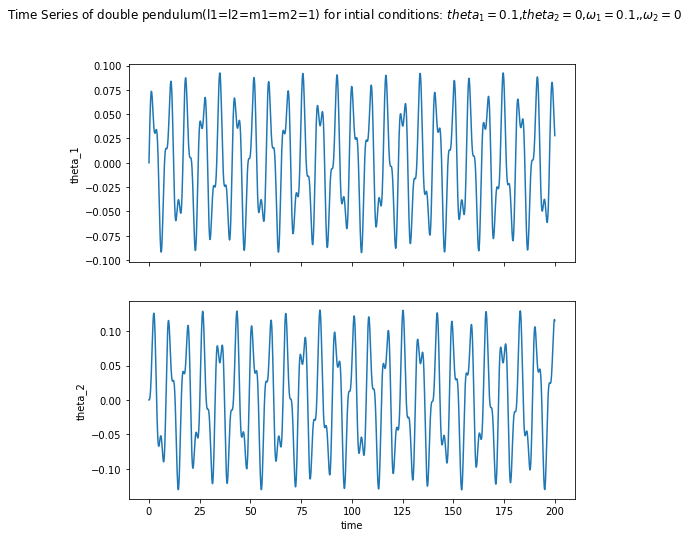

In [105]:
#l1=l2=m1=m2=1

traj1= doublependulumsolve(initial_omega1=0.1,timestep=0.1,numstep=2000)

fig,ax = plt.subplots(nrows=2,figsize=(8,8),sharex=True)
fig.suptitle("Time Series of double pendulum(l1=l2=m1=m2=1) for intial conditions: $theta_1=0.1$,$theta_2=0$,$\omega_1=0.1$,,$\omega_2=0$")
ax[0].plot(traj1["times"],traj1["theta1"])
ax[0].set_ylabel("theta_1")
ax[1].plot(traj1["times"],traj1["theta2"])
ax[1].set_xlabel("time")
ax[1].set_ylabel("theta_2")
fig.savefig("doublependulumtraj1.pdf")

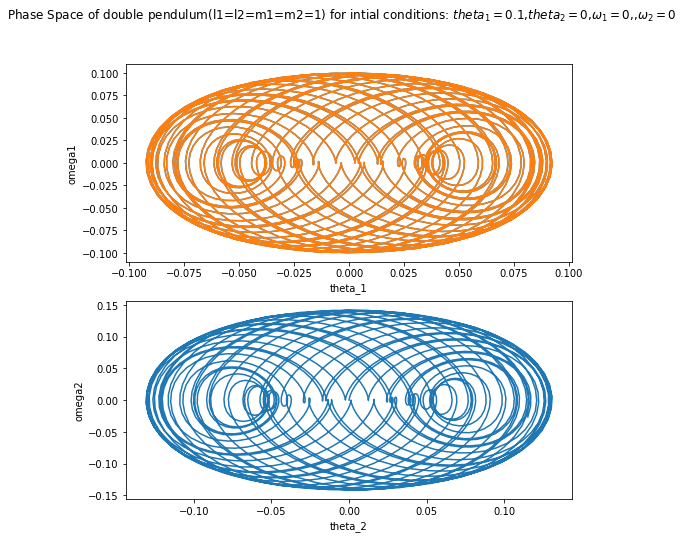

In [108]:
fig,ax = plt.subplots(nrows=2,figsize=(8,8))
fig.suptitle("Phase Space of double pendulum(l1=l2=m1=m2=1) for intial conditions: $theta_1=0.1$,$theta_2=0$,$\omega_1=0$,,$\omega_2=0$")
ax[0].plot(traj1["theta1"],traj1["omega1"])
ax[0].set_ylabel("omega1")
ax[0].set_xlabel("theta_1")
ax[0].plot(traj1["theta1"],traj1["omega1"])
ax[1].plot(traj1["theta2"],traj1["omega2"])
ax[1].set_ylabel("omega2")
ax[1].set_xlabel("theta_2")
fig.savefig("doublependulumtraj1phasespace.pdf")

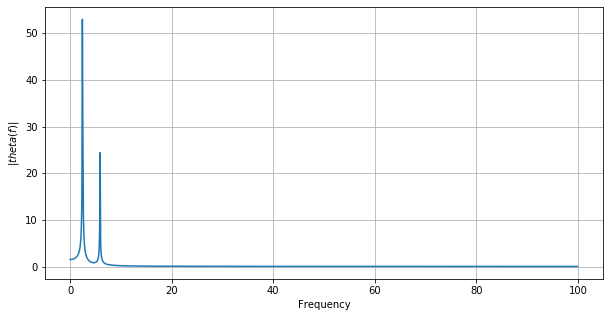

In [139]:
f1=scipy.fft(traj1["theta1"])

N = 2000
timestep = 0.1
freq = np.fft.fftfreq(N)*N*timestep

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(freq[:N//2],abs(f1)[0:N//2])
plt.xlabel("Frequency")
plt.ylabel("$|theta(f)|$")
plt.savefig("ffttheta1.pdf")

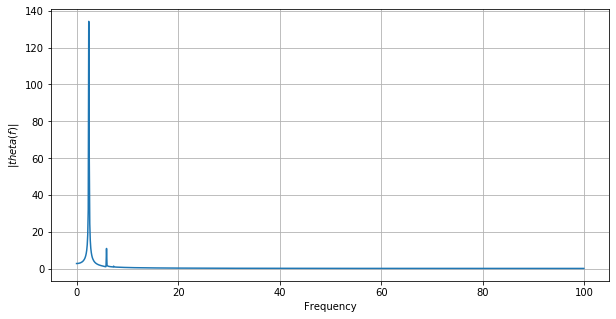

In [140]:
traj2=doublependulumsolve(initial_omega1=0.1,initial_omega2=0.2,timestep=0.1,numstep=2000)

f2=scipy.fft(traj2["theta1"])

N = 2000
timestep = 0.1
freq = np.fft.fftfreq(N)*N*timestep

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(freq[:N//2],abs(f2)[0:N//2])
plt.xlabel("Frequency")
plt.ylabel("$|theta(f)|$")
plt.savefig("ffttheta1excite.pdf")

In [186]:
triallist=[(s,doublependulumsolve(initial_omega1=s,timestep=0.1,numstep=2000)) for s in np.arange(0.1,3.1,0.1)]

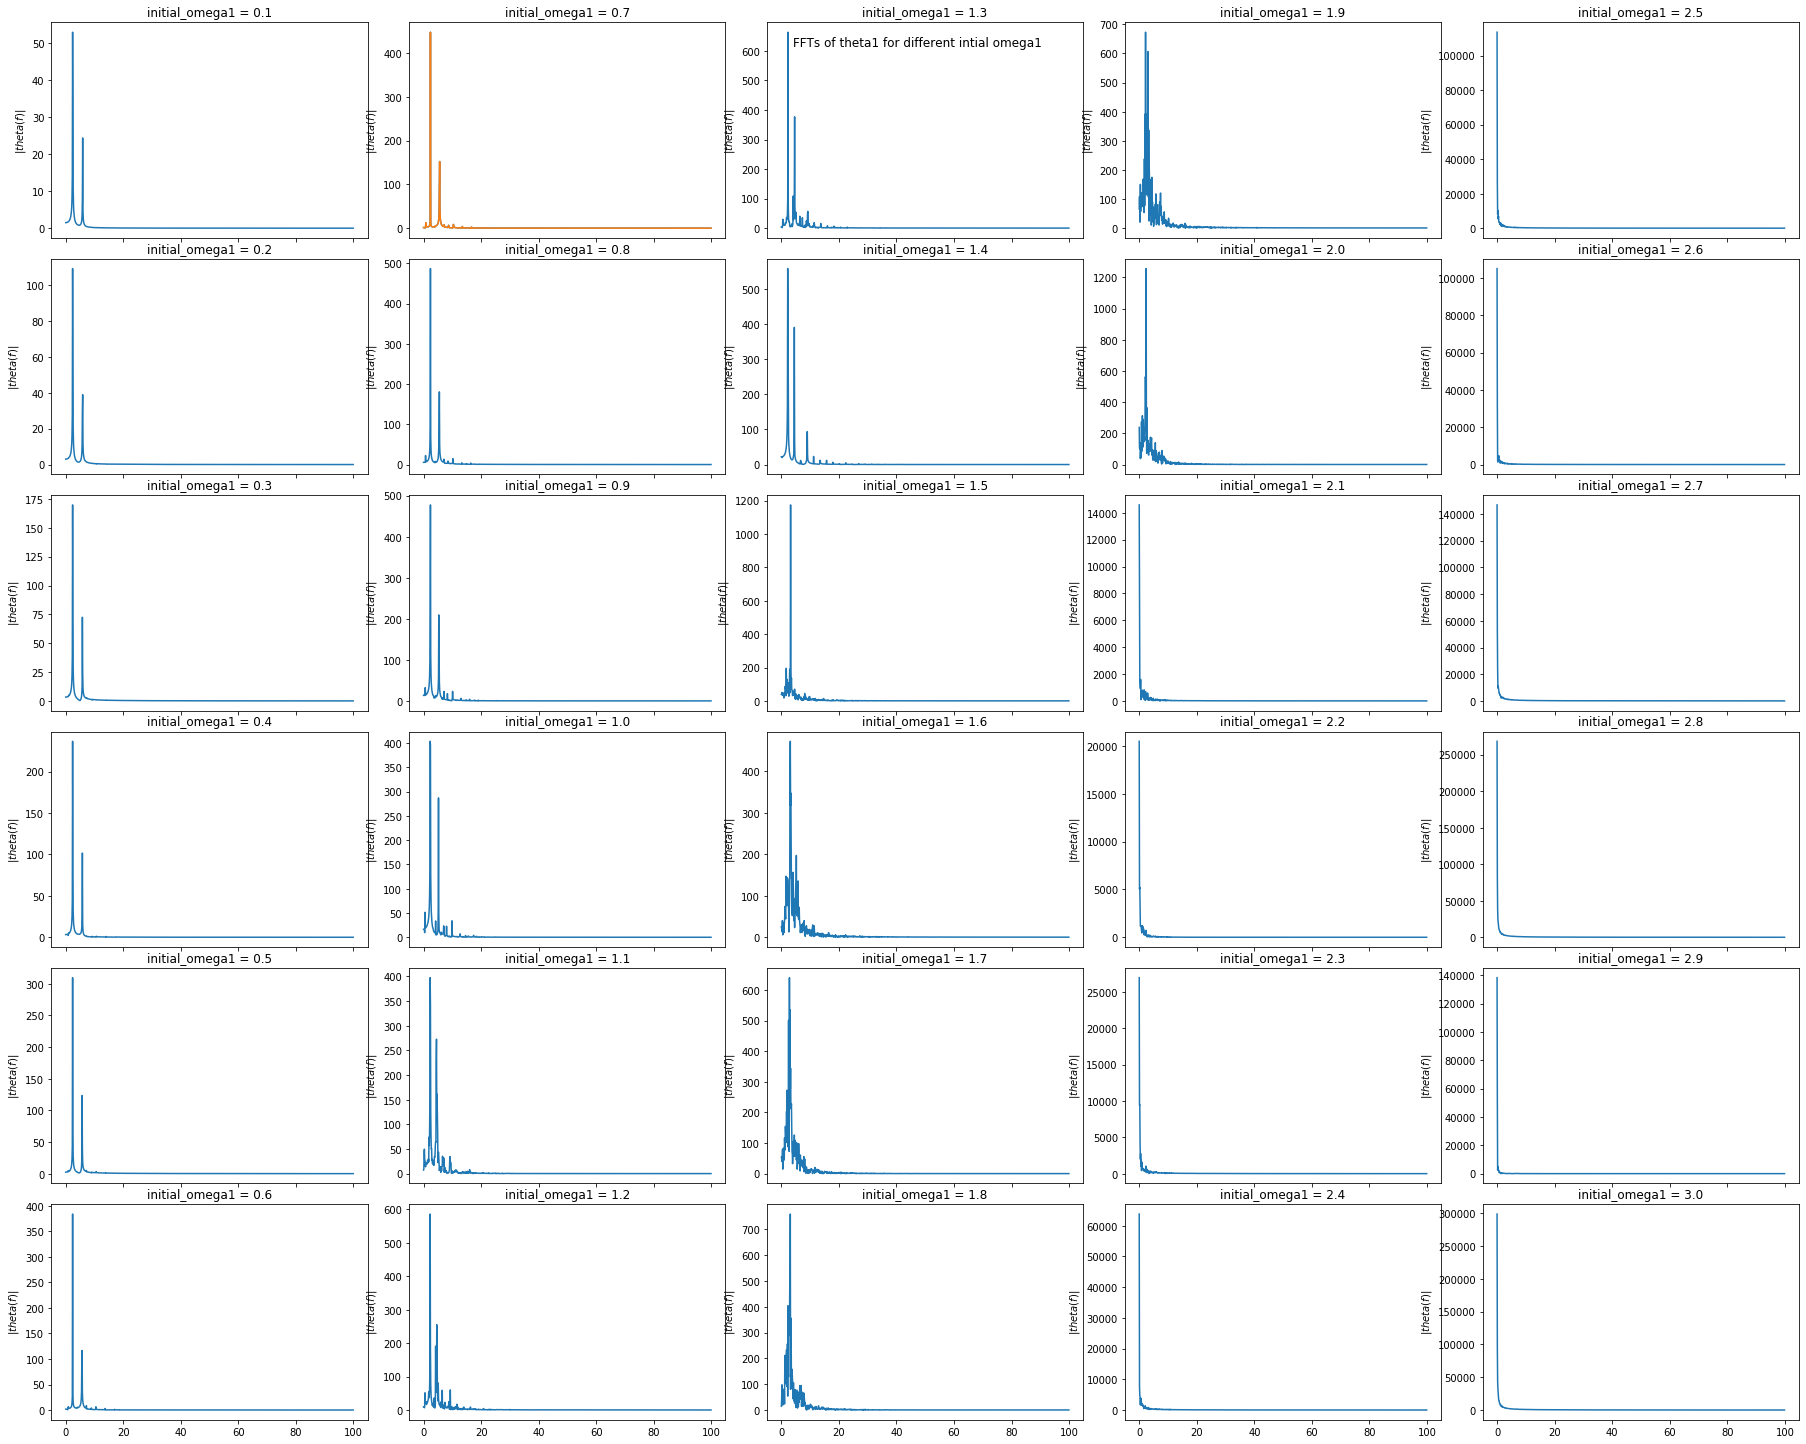

In [214]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(25,20),sharex=True)
fig.suptitle("FFTs of theta1 for different intial omega1")
fig.tight_layout()
x=0
y=0

for i in range(len(s)):
    
    f2=scipy.fft(triallist[i][1]["theta1"])

    N = 2000
    timestep = 0.1
    freq = np.fft.fftfreq(N)*N*timestep
    
    
    if(i==6):
        x = 0
        y = 1
        axes[x,y].plot(freq[:N//2],abs(f2)[0:N//2])
        axes[x,y].set_title("$\initial_omega1 = %3.1f $" %(s[i]))
        axes[x,y].set_ylabel("$|theta(f)|$")
        
    if(i==12):
        x = 0
        y = 2
        axes[x,y].plot(freq[:N//2],abs(f2)[0:N//2])
        axes[x,y].set_title("initial_omega1 = %3.1f" %(s[i]))
        axes[x,y].set_ylabel("$|theta(f)|$")
    elif(i==18):
        x = 0
        y = 3
        axes[x,y].plot(freq[:N//2],abs(f2)[0:N//2])
        axes[x,y].set_title("initial_omega1 = %3.1f" %(s[i]))
        axes[x,y].set_ylabel("$|theta(f)|$")   
    elif(i==24):
        x = 0
        y = 4
        axes[x,y].plot(freq[:N//2],abs(f2)[0:N//2])
        axes[x,y].set_title("initial_omega1 = %3.1f" %(s[i]))
        axes[x,y].set_ylabel("$|theta(f)|$")
    else:
        axes[x,y].plot(freq[:N//2],abs(f2)[0:N//2])
        axes[x,y].set_title("initial_omega1 = %3.1f" %(s[i]))
        axes[x,y].set_ylabel("$|theta(f)|$")
    x = x+1
    
fig.savefig("FFTomega.pdf")

In [217]:
longtraj1= doublependulumsolve(initial_omega1=0.1,timestep=0.1,numstep=60000)
longtraj2= doublependulumsolve(initial_omega1=1.3,timestep=0.1,numstep=60000)
longtraj3= doublependulumsolve(initial_omega1=1.5,timestep=0.1,numstep=60000)

In [225]:
%matplotlib qt

In [228]:
ShowDoublePendulumPoincare(longtraj1)


In [227]:
ShowDoublePendulumPoincare(longtraj2)



In [229]:
ShowDoublePendulumPoincare(longtraj3)

In [233]:
#l1=l2=m1=m2=1

traj2= doublependulumsolve(initial_omega1=1.3,timestep=0.1,numstep=2000)

fig,ax = plt.subplots(nrows=2,figsize=(8,8),sharex=True)
fig.suptitle("Time Series of double pendulum(l1=l2=m1=m2=1) for intial conditions: $theta_1=1.3$,$theta_2=0$,$\omega_1=0.1$,,$\omega_2=0$")
ax[0].plot(traj2["times"],traj2["theta1"])
ax[0].set_ylabel("theta_1")
ax[1].plot(traj2["times"],traj2["theta2"])
ax[1].set_xlabel("time")
ax[1].set_ylabel("theta_2")
fig.savefig("doublependulumtraj2.pdf")

In [234]:
#l1=l2=m1=m2=1

traj3= doublependulumsolve(initial_omega1=1.5,timestep=0.1,numstep=2000)

fig,ax = plt.subplots(nrows=2,figsize=(8,8),sharex=True)
fig.suptitle("Time Series of double pendulum(l1=l2=m1=m2=1) for intial conditions: $theta_1=1.5$,$theta_2=0$,$\omega_1=0.1$,,$\omega_2=0$")
ax[0].plot(traj3["times"],traj3["theta1"])
ax[0].set_ylabel("theta_1")
ax[1].plot(traj3["times"],traj3["theta2"])
ax[1].set_xlabel("time")
ax[1].set_ylabel("theta_2")
fig.savefig("doublependulumtraj3.pdf")

In [235]:
fig,ax = plt.subplots(nrows=2,figsize=(8,8))
fig.suptitle("Phase Space of double pendulum(l1=l2=m1=m2=1) for intial conditions: $theta_1=1.3$,$theta_2=0$,$\omega_1=0$,,$\omega_2=0$")
ax[0].plot(traj2["theta1"],traj2["omega1"])
ax[0].set_ylabel("omega1")
ax[0].set_xlabel("theta_1")
ax[0].plot(traj2["theta1"],traj2["omega1"])
ax[1].plot(traj2["theta2"],traj2["omega2"])
ax[1].set_ylabel("omega2")
ax[1].set_xlabel("theta_2")
fig.savefig("doublependulumtraj2phasespace.pdf")

In [236]:
fig,ax = plt.subplots(nrows=2,figsize=(8,8))
fig.suptitle("Phase Space of double pendulum(l1=l2=m1=m2=1) for intial conditions: $theta_1=1.3$,$theta_2=0$,$\omega_1=0$,,$\omega_2=0$")
ax[0].plot(traj3["theta1"],traj3["omega1"])
ax[0].set_ylabel("omega1")
ax[0].set_xlabel("theta_1")
ax[0].plot(traj3["theta1"],traj3["omega1"])
ax[1].plot(traj3["theta2"],traj3["omega2"])
ax[1].set_ylabel("omega2")
ax[1].set_xlabel("theta_2")
fig.savefig("doublependulumtraj3phasespace.pdf")